In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, data, color
import os

**1 a.** Apply two Gaussian filters with sigmas 2 and 4 respectively on a grayscale version of the “astronaut” image from the skimage data module. Now subtract the latter output (sigma=4) from the former one (sigma=2). Display the two outputs and this difference image side by side.



(-0.5, 511.5, 511.5, -0.5)

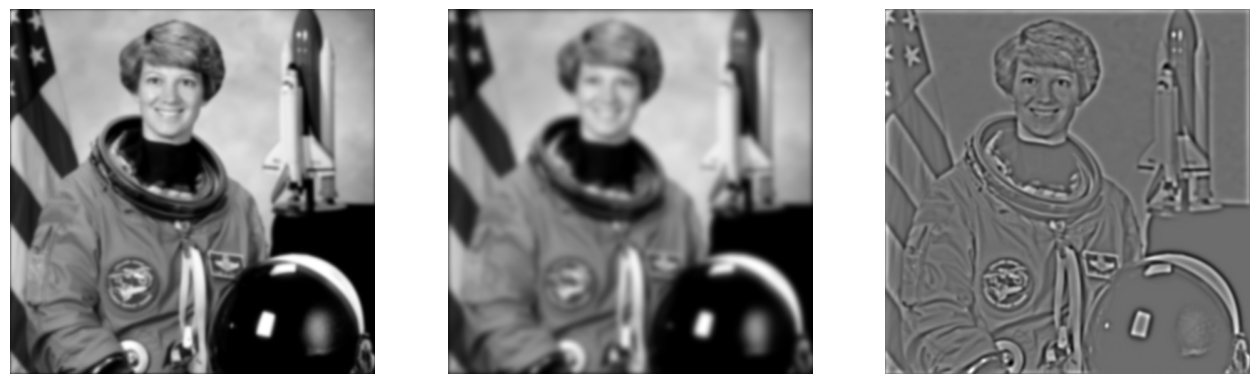

In [2]:
img = data.astronaut()
gray_image = color.rgb2gray(img)

out1 = filters.gaussian(gray_image, sigma=2, mode='constant',truncate=3)
out2 = filters.gaussian(gray_image, sigma=4, mode='constant',truncate=3)
out = out1-out2

out = out - np.amin(out)
out = out / np.amax(out)
out = np.uint8(out*255)

fig,(g2,g4,dif)= plt.subplots(ncols=3, figsize=(16, 8))
g2.imshow(out1,'gray')
g2.axis('off')

g4.imshow(out2,'gray')
g4.axis('off')

dif.imshow(out,'gray')
dif.axis('off')


**1 b.** Use SP.jpg (attached) for this question. This image has salt and pepper noise. Use a median filter to remove this noise. Display the original and new images side by side.


(-0.5, 511.5, 511.5, -0.5)

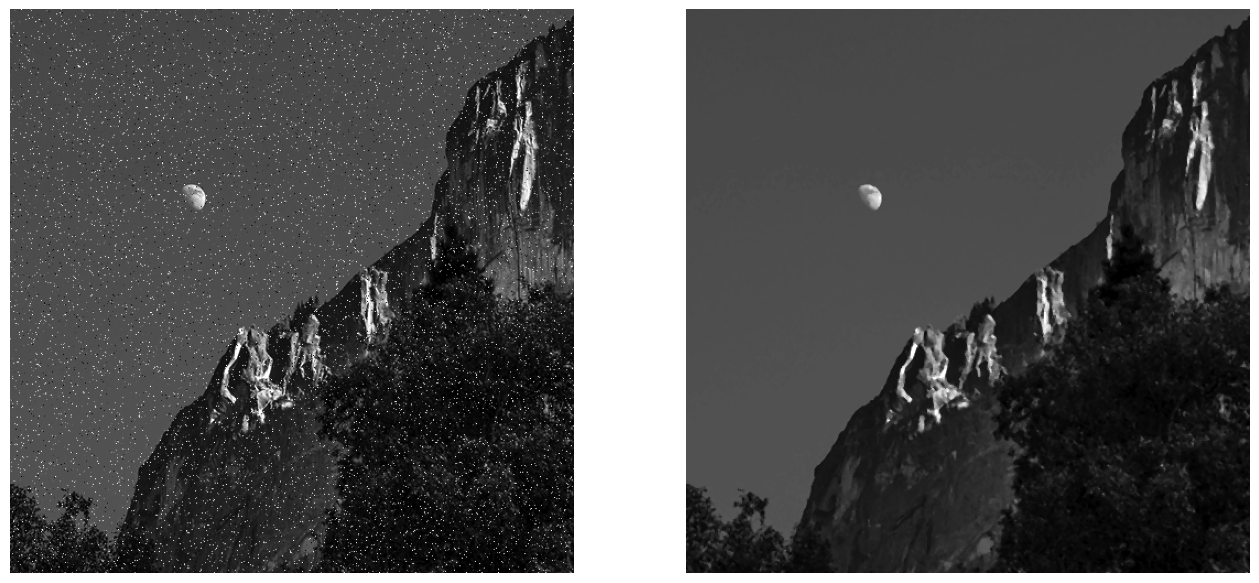

In [5]:
img = io.imread('SP.jpg')

out = filters.median(img)

fig,(orig,filt)= plt.subplots(ncols=2, figsize=(16, 8))

orig.imshow(img,'gray')
orig.axis('off')

filt.imshow(out,'gray')
filt.axis('off')

**2.** Write a function called tinyImage that creates a feature vector out of a color image as follows: the image is first resized to 16x16 pixels (skimage.transform.resize), then all pixels (16x16x3=768) are stretched out in the form of one vector. Repeat last week’s retrieval experiment on Oxford Flowers with this feature vector instead of color histogram. You may use any distance measure.

In [9]:
def tinyImage(img):
    image = transform.resize(img, (16,16), anti_aliasing=True)
    temp = image.flatten() # may also use reshape() or ravel()
    return temp

In [10]:
path = 'C:/work/data/oxford_flowers_102/jpg'
imagelist = os.listdir(path)
len(imagelist)
if imagelist[-1]=='Thumbs.db':
    imagelist = imagelist[:-1]
len(imagelist)

8189

In [11]:
featuresize = 768
features = np.zeros((len(imagelist),featuresize))

for i in range(len(imagelist)):
    image = io.imread(path + '/' + imagelist[i])
    features[i,:] = tinyImage(image)
    line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
    print(line, end='')

Processing 8189 of 8189

1680


(-0.5, 749.5, 499.5, -0.5)

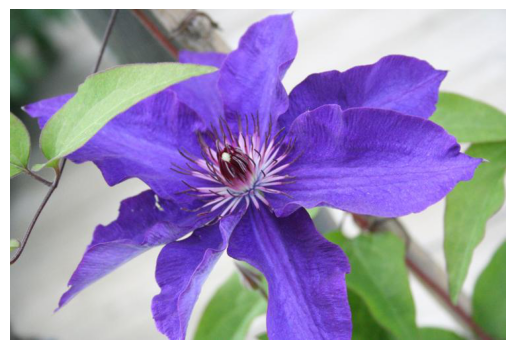

In [13]:
querynum = np.random.randint(len(imagelist))
print(querynum)
queryimage = io.imread(path + '/' + imagelist[querynum])
plt.imshow(queryimage)
plt.axis('off')

In [14]:
# Either of the two below is fine
def euclideanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

def manhattanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a-b))

In [15]:
distances = np.zeros(len(imagelist))
for i in range(len(imagelist)):
    distances[i] = manhattanDistance(features[querynum,:],features[i,:])
    line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
    print(line, end='')
    
order = np.argsort(distances)

Processing 8189 of 8189

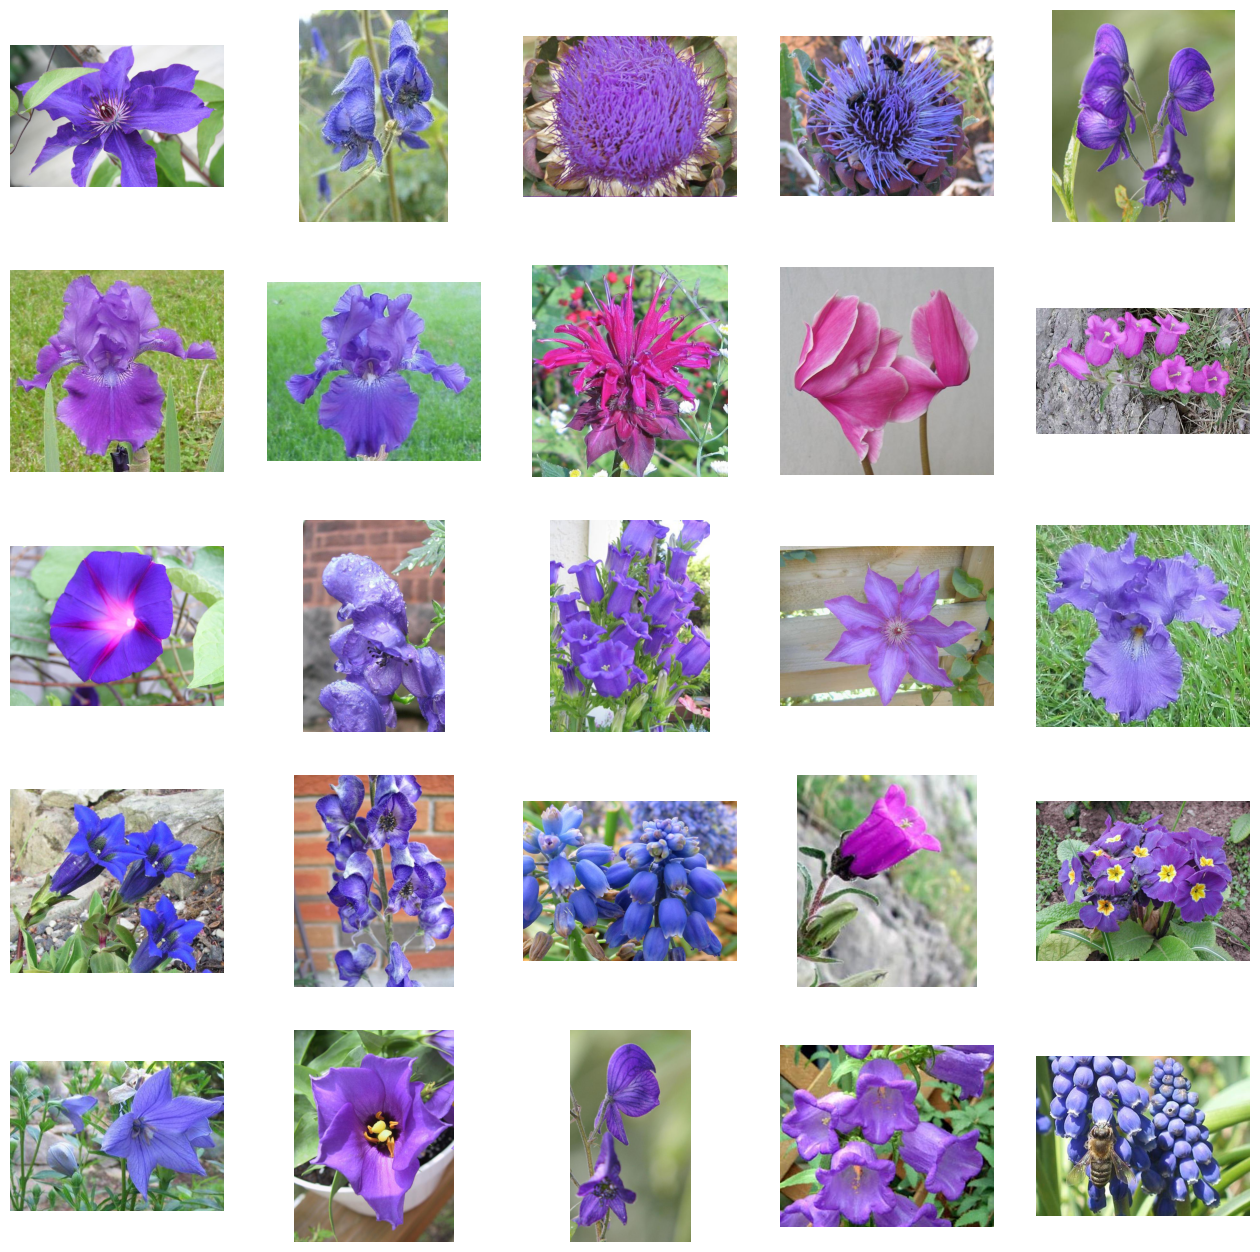

In [16]:
fig = plt.figure(figsize=[16,16])
rows = 5
cols = 5
for i in range(rows*cols):
    image = io.imread(path + '/' + imagelist[order[i]])
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()